## Notebook for visualizing chemical space in reduced dimensions

### Fig: 1d

In [1]:
import os, sys
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib.colors as mcolors

# Silence non-critical RDKit warnings to minimize unnecessary outputs
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import umap
# import hdbscan
# import molplotly

from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, PandasTools, Fragments, rdMolDescriptors, Descriptors, rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.PandasTools import ChangeMoleculeRendering
import plotly.express as px
from IPython.display import SVG, display

In [13]:
df = pd.read_csv('data_fig1d_tsne.csv')
df

,smiles,mean_property_value,database,class,tsne_0,tsne_1
0,C(C#CC(C)C)(C)C,5.481535,MP_oxstab,Other,5.317726,19.608474
1,C(=O)=O,9.433272,MP_oxstab,Other,2.272262,17.790176
2,O,7.902121,MP_oxstab,Other,2.631746,18.703068
3,C(=C\C)/C(C)C,5.085723,MP_oxstab,Other,5.377594,18.744755
4,c1(c(ccc(c1)C)C)C,4.733493,MP_oxstab,Aromatic,10.869368,0.089336
...,...,...,...,...,...,...
18383,O=C1OCC(F)O1,0.977029,EDB_2,Carbonate,8.495762,31.727039
18384,O=C1OCCO1,0.909369,EDB_2,Carbonate,5.988254,29.368194
18385,O=C=O,0.999000,EDB_2,Other,2.276040,17.803165
18386,O=S1(=O)CCCC1,0.985000,EDB_2,Sulfone,2.216475,31.213334


In [8]:
print(df['tsne_0'].min(), df['tsne_0'].max())
print(df['tsne_1'].min(), df['tsne_1'].max())

-71.29369306412178 61.825776645648055
-91.79770863528977 99.64534615855224


#### t-SNE plots

In [9]:
def create_cmap(listval, color):
    vmin = min(listval)
    vmax = max(listval)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = mcolors.LinearSegmentedColormap.from_list('', [(norm(vmin), 'white'), (norm(vmax), color)])
    return cmap, norm

In [14]:
mp_os_ = df.loc[df['database'] == 'MP_oxstab']
edb_cond_ = df.loc[df['database'] == 'EDB_1']
edb_ce_ = df.loc[df['database'] == 'EDB_2']

In [15]:
mp_os_ = mp_os_.loc[mp_os_['mean_property_value'] > 3.0] ## to distinguish colors

#### Complete t-SNE plot (on left side of Fig 1d for oxidative stability)

([], [])

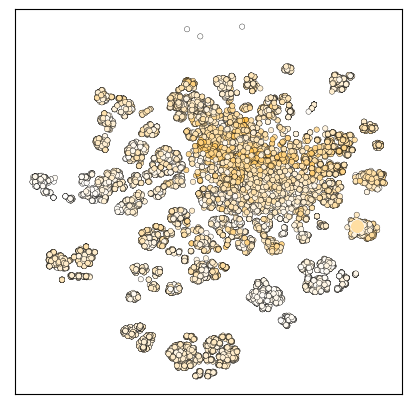

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
cmap1, norm1 = create_cmap(mp_os_["mean_property_value"], 'orange')  ## orange colormap --> Oxstab
cmap2, norm2 = create_cmap(edb_cond_["mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
cmap3, norm3 = create_cmap(edb_ce_["mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE

# Define the coordinates of the points you want to highlight
highlight_coords = [tuple(row) for row in df_.loc[df_['smiles'].isin(['c1cc2c(cc1)C(=O)c1c(C2=O)cccc1'])][['tsne_0', 'tsne_1']].values]

mask1 = ~mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
scatter1 = ax.scatter(mp_os_[mask1]["tsne_0"], mp_os_[mask1]["tsne_1"], c=mp_os_[mask1]["mean_property_value"], s=15, cmap=cmap1, norm=norm1, label='MP-E$_{ox}$', edgecolors='black', linewidths=0.25)
mask2 = mp_os_[['tsne_0', 'tsne_1']].apply(tuple, 1).isin(highlight_coords)
scatter1_ = ax.scatter(mp_os_[mask2]["tsne_0"], mp_os_[mask2]["tsne_1"], c=mp_os_[mask2]["mean_property_value"], s=100, cmap=cmap1, norm=norm1, edgecolors='white', linewidths=0.5)

plt.xticks([])
plt.yticks([])

# plt.savefig('tsne_fig1f.eps'.format(trial), dpi=300)
# plt.savefig('plot_tsne_fig1d.tiff', dpi=300, transparent=True)

#### Zoomed-in t-SNE plot (on right side of Fig 1d for conductivity & CE)

In [17]:
edb_ce_['log_mean_property_value'] = -np.log10(1 - edb_ce_['mean_property_value'])

/var/folders/s5/lmr5dh0n4bsgnpxrzwlts5lw0000gn/T/ipykernel_43222/57946540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edb_ce_['log_mean_property_value'] = -np.log10(1 - edb_ce_['mean_property_value'])


([], [])

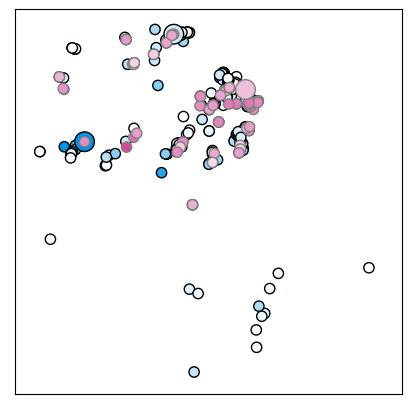

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
cmap1, norm1 = create_cmap(mp_os_["mean_property_value"], 'orange')  ## orange colormap --> Oxstab
cmap2, norm2 = create_cmap(edb_cond_["mean_property_value"], (0, 0.576, 0.902))  ## blue colormap --> Conductivity
cmap3, norm3 = create_cmap(edb_ce_["log_mean_property_value"], (0.839, 0.286, 0.604))  ## purple colormap --> CE
# Define the coordinates of the points you want to highlight
highlight_coords_1_ = [tuple(row) for row in df_.loc[df_['smiles'].isin(['CC#N', 'CC1COC(=O)O1'])][['tsne_0', 'tsne_1']].values]
highlight_coords_2_ = [tuple(row) for row in df_.loc[df_['smiles'].isin(['COCCOC', 'COCCOCCOCC(F)(F)OC(F)(F)C(F)(F)OC(F)(F)COCCOCCOC'])][['tsne_0', 'tsne_1']].values]

# scatter1 = ax.scatter(mp_os_["tsne_0"], mp_os_["tsne_1"], c=mp_os_["mean_property_value"], s=40, cmap=cmap1, label='MP-E$_{ox}$') ## uncomment to also visualize MP-oxstab database

# Create a mask that is True for all points except the ones at highlight_coords
mask1_1 = ~edb_cond_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_1_)
scatter1_1 = ax.scatter(edb_cond_[mask1_1]["tsne_0"], edb_cond_[mask1_1]["tsne_1"], c=edb_cond_[mask1_1]["mean_property_value"], s=55, cmap=cmap2, label='EDB-$\sigma$', edgecolors='black')

# Create a mask that is True only for the points at highlight_coords and plot these points with a different edge color
mask1_2 = edb_cond_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_1_)
scatter1_2 = ax.scatter(edb_cond_[mask1_2]["tsne_0"], edb_cond_[mask1_2]["tsne_1"], c=edb_cond_[mask1_2]["mean_property_value"], s=200, cmap=cmap2, label='EDB-$\sigma$', edgecolors='black', vmin=edb_cond_["mean_property_value"].min(), vmax=edb_cond_["mean_property_value"].max())

mask2_1 = ~edb_ce_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_2_)
scatter2_1 = ax.scatter(edb_ce_[mask2_1]["tsne_0"], edb_ce_[mask2_1]["tsne_1"], c=edb_ce_[mask2_1]["log_mean_property_value"], s=55, cmap=cmap3, label='EDB-CE', edgecolors='grey')

mask2_2 = edb_ce_[['tsne_0', 'tsne_1']].apply(tuple, axis=1).isin(highlight_coords_2_)
scatter2_2 = ax.scatter(edb_ce_[mask2_2]["tsne_0"], edb_ce_[mask2_2]["tsne_1"], c=edb_ce_[mask2_2]["log_mean_property_value"], s=200, cmap=cmap3, label='EDB-CE', edgecolors='grey', vmin=edb_ce_["log_mean_property_value"].min(), vmax=edb_ce_["log_mean_property_value"].max())
# scatter3 = ax.scatter(edb_ce["tsne_0"], edb_ce["tsne_1"], c=edb_ce["mean_property_value"], s=55, cmap=cmap3, label='EDB-CE', edgecolors='grey')
plt.xlim([-13,40])
plt.ylim([-13,35])

plt.xticks([])
plt.yticks([])

# plt.colorbar(scatter1, ax=ax, orientation='horizontal', label='Mean property value') ## uncomment to visualize colorbar for MP-oxstab database
# plt.colorbar(scatter1_1, ax=ax, orientation='horizontal', label='Mean property value', ticks=np.linspace(edb_cond_['mean_property_value'].min(), edb_cond_['mean_property_value'].max(), 5)) ## uncomment to visualize colorbar for EDB-1 database
# plt.colorbar(scatter2_2, ax=ax, orientation='horizontal', label='Log mean property value', ticks=np.linspace(edb_ce_['log_mean_property_value'].min(), edb_ce_['log_mean_property_value'].max(), 5))

# plt.savefig('plot_tsne_fig1d_zoom.eps', dpi=300, bbox_inches='tight')